In [1]:
classes = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']
super_classes = ['aquatic_mammals', 'fish', 'flowers', 'food_containers', 'fruit_and_vegetables', 'household_electrical_devices', 'household_furniture', 'insects', 'large_carnivores', 'large_man-made_outdoor_things', 'large_natural_outdoor_scenes', 'large_omnivores_and_herbivores', 'medium_mammals', 'non-insect_invertebrates', 'people', 'reptiles', 'small_mammals', 'trees', 'vehicles_1', 'vehicles_2']

In [42]:
import tensorflow as tf

ds_train, ds_test = tf.keras.datasets.cifar100.load_data()

ds_train = tf.data.Dataset.from_tensor_slices(ds_train)
ds_test = tf.data.Dataset.from_tensor_slices(ds_test)

for image, label in ds_train.take(1):
  print(image.shape, label.shape)

(32, 32, 3) (1,)


Nos fijamos que en los datasets resultantes las imágenes tienen el formato adecuado 32x32 pixels y 3 canales pero las etiquetas deberían ser de escalares. Convertimos las etiquetas para que tengan dimensión ().

In [43]:
# Las etiquetas son tensores de dimensión (1,) convertimos a ()
def reshape_label(image, label):
  return image, tf.reshape(label, ())

ds_train = ds_train.map(reshape_label)
ds_test = ds_test.map(reshape_label)

TypeError: ignored

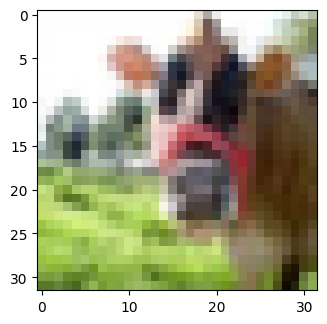

In [24]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
# Mostramos 4 imágenes del dataset de entrenamiento
for i, x in enumerate(ds_train.take(4)):
  image, label = x
  plt.subplot(2, 2, i+1)
  plt.imshow(image)
  plt.title(f"{classes[label]}: {label}")

In [21]:
def normalize_image(image, label):
  image = tf.cast(image, tf.float32) / 255.0
  label = tf.reshape(label, ()) # Las etiquetas vienen como tensor (1,)
  label = tf.one_hot(label, depth=len(classes))
  return image, label

ds_train.map(normalize_image), ds_test.map(normalize_image)

(<_MapDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(1, 100), dtype=tf.float32, name=None))>,
 <_MapDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(1, 100), dtype=tf.float32, name=None))>)

(<tf.Tensor: shape=(32, 32, 3), dtype=uint8, numpy=
array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [195, 205, 193],
        [212, 224, 204],
        [182, 194, 167]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [170, 176, 150],
        [161, 168, 130],
        [146, 154, 113]],

       [[255, 255, 255],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [189, 199, 169],
        [166, 178, 130],
        [121, 133,  87]],

       ...,

       [[148, 185,  79],
        [142, 182,  57],
        [140, 179,  60],
        ...,
        [ 30,  17,   1],
        [ 65,  62,  15],
        [ 76,  77,  20]],

       [[122, 157,  66],
        [120, 155,  58],
        [126, 160,  71],
        ...,
        [ 22,  16,   3],
        [ 97, 112,  56],
        [141, 161,  87]],

       [[ 87, 122,  41],
        [ 88, 122,  39],
        [101, 134,  56],
        ...,
        [ 34,  36,  10

In [ ]:
# Definir el tamaño del lote y mezclar el conjunto de entrenamiento
batch_size = 128
train_dataset = ds_train.shuffle(buffer_size=len(classes)).batch(batch_size)

# Definir el modelo de la red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo utilizando el conjunto de datos
model.fit(ds_train, epochs=5)

Epoch 1/5


ValueError: ignored

In [14]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Cargar los datos MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Crear conjuntos de datos a partir de los tensores
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

# Normalizar las imágenes dentro del conjunto de datos
def normalize_image(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    label = tf.one_hot(label, depth=10)
    return image, label

train_dataset = train_dataset.map(normalize_image)
test_dataset = test_dataset.map(normalize_image)

# Definir el tamaño del lote y mezclar el conjunto de entrenamiento
batch_size = 128
train_dataset = train_dataset.shuffle(buffer_size=len(train_labels)).batch(batch_size)

# Definir el modelo de la red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo utilizando el conjunto de datos
model.fit(train_dataset, epochs=5)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
469/469 [==============================] - 14s 6ms/step - loss: 0.3970 - accuracy: 0.8869
Epoch 2/5
469/469 [==============================] - 4s 4ms/step - loss: 0.1918 - accuracy: 0.9455
Epoch 3/5
469/469 [==============================] - 4s 5ms/step - loss: 0.1454 - accuracy: 0.9573
Epoch 4/5
469/469 [==============================] - 7s 6ms/step - loss: 0.1161 - accuracy: 0.9655
Epoch 5/5
469/469 [==============================] - 6s 6ms/step - loss: 0.1007 - accuracy: 0.9698


In [16]:
dataset_test = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
for elem in dataset_test:
  print(elem)
  break

(<tf.Tensor: shape=(28, 28), dtype=uint8, numpy=
array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 